#### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 6
### Due: Monday, Mar 14th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on March 14th (after Spring Break).

---

## Problem 1

**The Leavitt Law**

Cepheid variable stars in galaxies follow a linear relation between their log periods, log metallicity, and apparent magnitude (the Leavitt law):

$$m_i^W = zp_{W,N4258} + b_W \log P_i + Z_w \Delta \log (O/H)_i \;\;\; (1)$$

where 
$$m^W = m_H - 0.39(V-I)$$

and is called the "Wesenheit magnitude".

The index $i$ here denotes the individual Cepheids in a sample.


Download table 4 from Riess et al. (2016):

https://ui.adsabs.harvard.edu/abs/2016yCat..18260056R/abstract

You will find the tables here:
https://cdsarc.cds.unistra.fr/viz-bin/cat/J/ApJ/826/56#/browse
Table descriptions are in the readme file.

Use the data for Cepheids in NGC 4258 from Table 4. Assuming that there is no intrinsic scatter in the Leavitt law, the parameters
of Equation (1) can be determined through ordinary least squares. Determine the best-fit
parameters $zp_{W,N4258}$, $b_W$, and $Z_w$ and their Gaussian covariance matrix. Plot the data $m^W_i$ vs. $\log_{10} P_i$ and overlay the best fit model (evaluated at the mean metallicity of the sample).








### Solution

Parameters (𝑧𝑝𝑊,𝑁4258, 𝑏𝑊, and 𝑍𝑤): 
 [23.75988994  3.29303047 -0.59523081]
Covariance matrix: 
 [[ 9.01640447 -0.12791561 -0.99250138]
 [-0.12791561  0.02722505  0.01036107]
 [-0.99250138  0.01036107  0.10983245]]


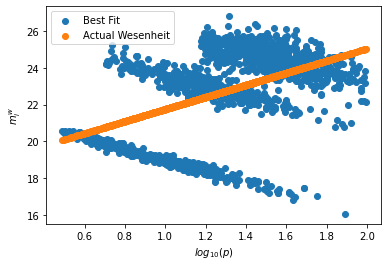

In [18]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import math
from scipy.optimize import curve_fit
import scipy
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm


#Defining function to be used to fitting parameters
def leavitt_law(x, zp, b, zw):
    pwi = x[0]
    OH = x[1]
    return zp + b * pwi + zw * OH

# Getting and reading data
link = 'https://cdsarc.cds.unistra.fr/ftp/J/ApJ/826/56/table4.dat'
columns = ["Object", "Right Ascension", "Declination", "ID", "Per", "V-I", "F160W", "sigTot", "del log(O/H)"]
data = pd.read_table(link, names = columns, delim_whitespace=True)
data["logPi"]=data["Per"].apply(lambda x: math.log10(x))

y = data["F160W"].values
x = [data["logPi"].values, data["del log(O/H)"].values]
m, n = curve_fit(leavitt_law, x, y)

print("Parameters (𝑧𝑝𝑊,𝑁4258, 𝑏𝑊, and 𝑍𝑤): \n", m)
print("Covariance matrix: \n",n)

#Finding magnitude values at mean metallicity
mean_met = data["del log(O/H)"].mean()
zp = m[0]
b = m[1]
zw = m[2]
data["predicted_mean"] =data["logPi"].apply(lambda logPi: leavitt_law([logPi, mean_met], zp, b, zw))

#Plotting actual wesenheit and best fit(predicted wesenheit)
x = data["logPi"]
y = data["F160W"]
plt.scatter(x,y)
y_pred_mean = data["predicted_mean"]                                              
plt.scatter(x,y_pred_mean)
plt.ylabel("$m_{i}^{w}$")
plt.xlabel("$log_{10}(p)$")
plt.legend(['Best Fit', 'Actual Wesenheit'])

## Problem 2

**Posterior probability distribution of binomial distribution**

Given a set of $N$ measurements, $x_i$, drawn from a binomial distribution described with parameter $b$, we seek the posterior probability distribution $p(b|x_i)$.

When $N$ is large, $b$ and its (presumably Gaussian) uncertainty $\sigma_b$ can be determined using the equation above. For small $N$, the proper procedure is as follows. Assuming that the prior for $b$ is at in the range 0-1, the posterior probability for $b$ is

$$p(b|k,N) = C b^k (1-b)^{N-k}$$

where $k$ is now the actual observed number of successes in a data set of $N$ values, and $C$ is a normalization factor with can be determined from the condition

$$\int_0 ^1 p(b|k,N)db=1.$$

The maximum posterior occurs at $b_0 = k/N$.

Write code for calculating the posterior distribution.
Vary the value $b$ and draw the resulted posterior probability distribution from our data set. 

In comparison, also calculate a Gaussian distribution from the same data set.


### Solution



Here k is 5 and N is 7


Text(0, 0.5, 'Probability')

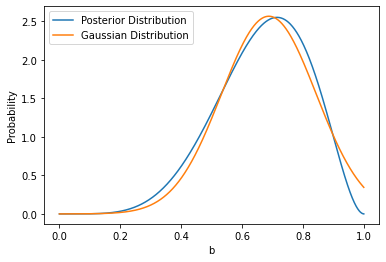

In [47]:
# Importing all the necessary libraries
import random
import numpy as np
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm



# Defining two variables k and N
# Giving two random integers for the variables
k = 5
N = 7
print("Here k is", k, "and N is", N)

# Defining the necessary functions
def posterior(b, k, N):
    return (b**k)*((1-b)**(N-k))

def post_dist(k, N):
    list_1 = []
    list_2 = np.arange(0,1,0.001)
    
    for b in list_2:
        list_1.append(posterior(b, k, N))
        
    list_1 = list_1/(sum(list_1)*0.001)
    
    return list_1, list_2

y,x = post_dist(k, N)

#Guassian approxmation of PDF
def normal_dist(x,mean,sd):
    a = 1/(sd*math.sqrt(2*np.pi))
    b = np.exp(-0.5*((x-mean)/sd)**2)
    return a*b

b_0   = k/N
p_0 = [b_0,.1]
m, n = curve_fit(normal_dist, x, y, p_0)
mean = m[0]
sd   = m[1]
pdf  = stats.norm(mean, sd).pdf(x)



plt.plot(x,y)
plt.plot(x, pdf)
plt.legend(['Posterior Distribution', 'Gaussian Distribution'])
plt.xlabel('b')
plt.ylabel('Probability')